**Stock price predictor**

This Program uses an Artificial Recurrent Neural Network (RNN) called Long Short Term Meomery(LSTM)

In [ ]:
# Importing The Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
pip install --upgrade pandas-datareader

     |████████████████████████████████| 109 kB 36.2 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
# getting the stock price

df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')

# display the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.629209
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.697079
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.838044
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.972249
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.951672
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.899139
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,67.069626
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.981300


In [ ]:
df.shape
# no. of rows and columns

(2003, 6)

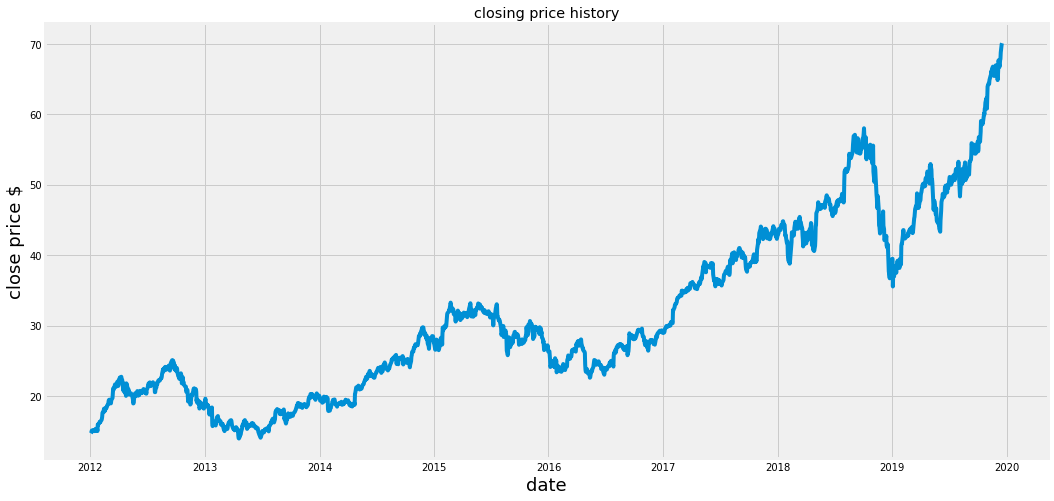

In [ ]:
# plotting the closing price
# visualising

plt.figure(figsize=(16,8))
plt.title('closing price history')
plt.plot(df['Close'])   # accessing the close column in df above
plt.xlabel('date', fontsize = 18)
plt.ylabel('close price $', fontsize = 18)
plt.show()


In [ ]:
# creating a new dataframe with only close column
data = df.filter(['Close'])

# convert the dataframe to numpy array
dataset = data.values

# get no. of rows to train the model on
training_data_len = math.ceil(len(dataset)*0.8)   # means we are blocking about 80% of data for
                                                  # Training our neural network

training_data_len

1603

**Scaling data to fit in Neural Network**


In [ ]:
# let's scale our data
# neural network takes value only in range [0,1]
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
# fit_transform() is used for scaling our data and also learn the scaling parameters
# it finds the min and max range and then accordingly scale the data (generally b/w 0 to 1)

scaled_data # all value will be from 0 to 1 now

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [ ]:
print(scaled_data.shape)
training_data_len

(2003, 1)


1603

In [ ]:
# create the training data set
# create the scaled training data set

train_data = scaled_data[0:training_data_len, :]    
# getting no of rows from 0 to training data len(1603) and all columns(1)

# split the data into x_train and y_train sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])   # x_train will have values from 0 to 59th index( 60 values)
  y_train.append(train_data[i, 0])    # y_train will have values froom 60th index till len(train_data)
  if i<=61:
    print(x_train)
    print()
    print(y_train)
    print()

# on making i<=61 
# it has 2 arrays of x_train i.e. for i=0 and i=1 hence in the
# 2nd pass 1st value is 2nd element of 1st pass(0.01316509, 0.01457063) and in y_train 
# 1st value is last value of 2nd pass (0.13949272)

# this shows us that the model is accounting for prev values(inputs)

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]

[0.13949272033425864]

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.0

In [ ]:
# converting to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(1543, 60)

In [ ]:
# reshape the data
# we need to reshape because the LSTM model expects a 3D data (no. of samples, no. of time steps, no. of features) 
# and our data is currently 2D

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# reshape(reshaping_list , (samples, time steps, features))
# reshape(x_train, (1543, 60, 1))
# 1543 : no. of samples to look at
# 60 : in one loop or go through see 60 samples (step)
# 1 : only 1 feature i.e. close price

x_train.shape

(1543, 60, 1)

**Building the model**

In [ ]:
from keras.models import Sequential

In [ ]:
# build the LSTM model
# adding various layers to neural network
# 50 : no. of neurons , return_sequences = true in first layer since 
# we'll add another layer , so need to use previous layers output

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1))) # input_shape = (60(time step), 1(no.of features))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))  # normal densely connected layer with 25 neurons
model.add(Dense(1))   # 1 neuron only

# A Dense layer feeds all outputs from the previous layer to all its neurons, it is a fully connected layer
# used for outputting a prediction

**Compiling the model**

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# optimizer is used to improve upon the loss function
# loss function is used to check how well the model performed while training

**Training the model**

In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size = 1, epochs=1)
# epochs : no. of iteration , the entire dataset is passed forward and backward through neural network

1543/1543 [==============================] - 52s 21ms/step - loss: 9.6121e-04 - accuracy: 4.9027e-04


**preparing for TESTING**

In [ ]:
# create the testing data set
# create a new array with values scaled from index 1543 to 2003
test_data = scaled_data[training_data_len - 60 :, : ]
# create the data sets for x_test and y_test
x_test = []
y_test = dataset[training_data_len : , :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  
# converting to numpy array
x_test = np.array(x_test)

# reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


**Checking the model**

In [ ]:
# getting the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
# inverse transform kind of unscales the data

In [ ]:
# get the RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.7433271884918213

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


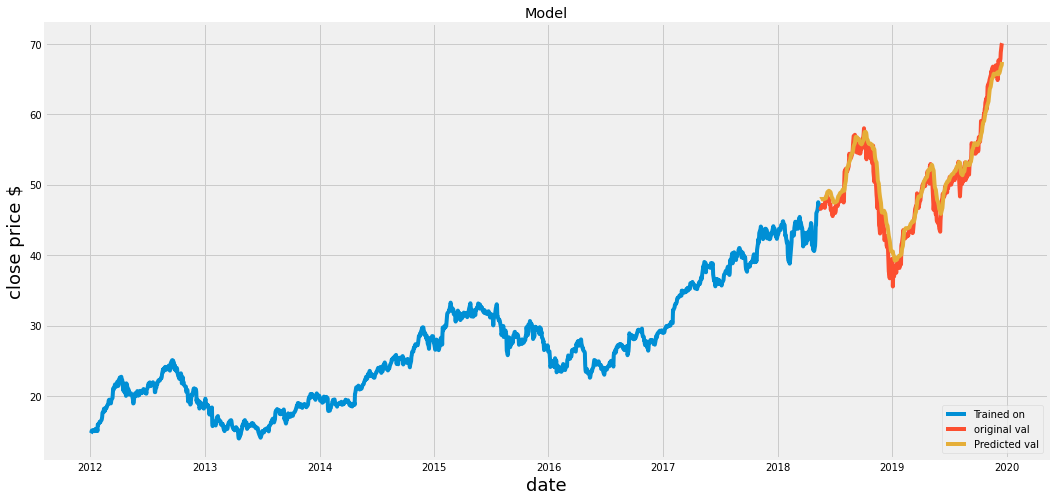

In [ ]:
# plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# visualise the data
# plotting the closing price
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('date', fontsize = 18)
plt.ylabel('close price $', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Trained on', 'original val', 'Predicted val'], loc = 'lower right')
plt.show()


In [ ]:
# showing the valid predicted prices
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,47.951790
2018-05-18,46.577499,47.981743
2018-05-21,46.907501,47.950508
2018-05-22,46.790001,47.932041
2018-05-23,47.090000,47.908779
...,...,...
2019-12-11,67.692497,66.218376
2019-12-12,67.864998,66.439789
2019-12-13,68.787498,66.672539


In [ ]:
# get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
# create a new dataframe
new_df = apple_quote.filter(['Close'])
# get the closing price for last 60 days and convert it to an array
last_60_days = new_df[-60:].values
# scale the data b/w 0 to 1
last_60_days_scaled = scaler.transform(last_60_days)
# create an empty list
x_test = []
x_test.append(last_60_days_scaled)
x_test = np.array(x_test)
# reshape the data
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))
# get the prdeicted scaled price
pred_price = model.predict(x_test)
# undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[67.894646]]


In [ ]:
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(apple_quote2['Close']) 

Date
2019-12-18    69.934998
Name: Close, dtype: float64
